<a href="https://colab.research.google.com/github/BhargaviM0729/-Noise-Reduction-in-Sensor-Data-Using-a-Simple-Kalman-Filter/blob/main/%E2%80%9CNoise_Reduction_in_Sensor_Data_Using_a_Simple_Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

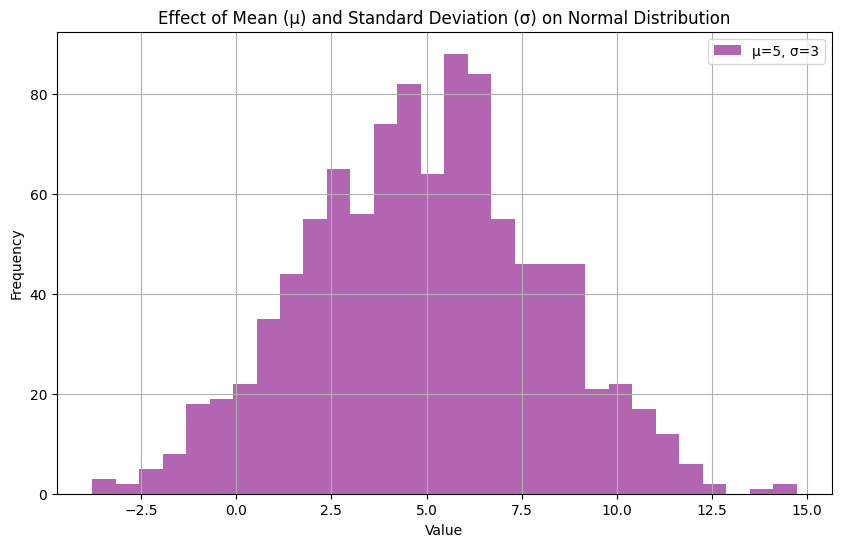

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random values for different cases
np.random.seed(42)  # For reproducibility

# Case 1: Mean = 0, Sigma = 1
data1 = np.random.normal(loc=0, scale=1, size=1000)

# Case 2: Mean = 0, Sigma = 3 (More spread)
data2 = np.random.normal(loc=0, scale=3, size=1000)

# Case 3: Mean = 5, Sigma = 1 (Shifted distribution)
data3 = np.random.normal(loc=5, scale=1, size=1000)

# Case 4: Mean = 5, Sigma = 2 (Shifted + More spread)
data4 = np.random.normal(loc=5, scale=3, size=1000)

# Plot the distributions
plt.figure(figsize=(10, 6))
#plt.hist(data1, bins=30, alpha=0.6, color='blue', label="μ=0, σ=1")
#plt.hist(data2, bins=30, alpha=0.6, color='green', label="μ=0, σ=3")
#plt.hist(data3, bins=30, alpha=0.6, color='red', label="μ=5, σ=1")
plt.hist(data4, bins=30, alpha=0.6, color='purple', label="μ=5, σ=3")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Effect of Mean (μ) and Standard Deviation (σ) on Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()


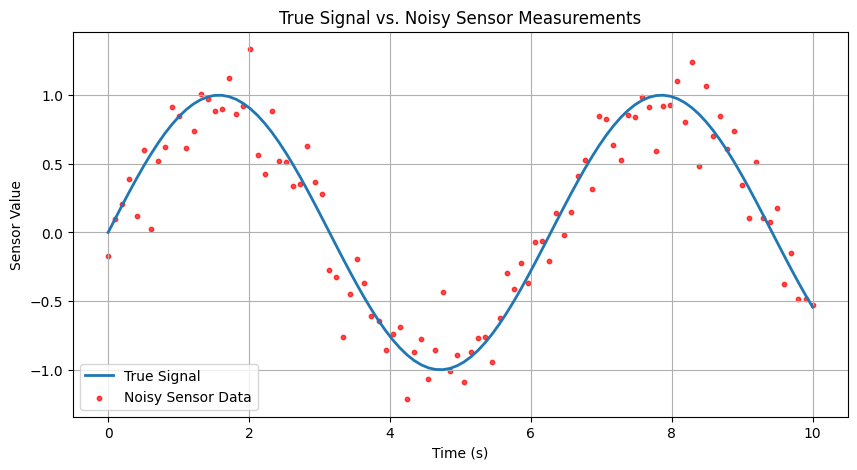

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a clean signal (true values)
time = np.linspace(0, 10, 100)  # Time from 0 to 10 seconds
true_signal = np.sin(time)  # Example: A sine wave representing real sensor data

# Add Gaussian noise (Mean = 0, Standard Deviation = 0.2)
noise = np.random.normal(0, 0.2, size=time.shape)
noisy_signal = true_signal + noise  # Simulated sensor reading with noise

# Plot the true signal and noisy measurements
plt.figure(figsize=(10, 5))
plt.plot(time, true_signal, label="True Signal", linewidth=2)
plt.scatter(time, noisy_signal, label="Noisy Sensor Data", color='red', s=10, alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Sensor Value")
plt.title("True Signal vs. Noisy Sensor Measurements")
plt.legend()
plt.grid()
plt.show()


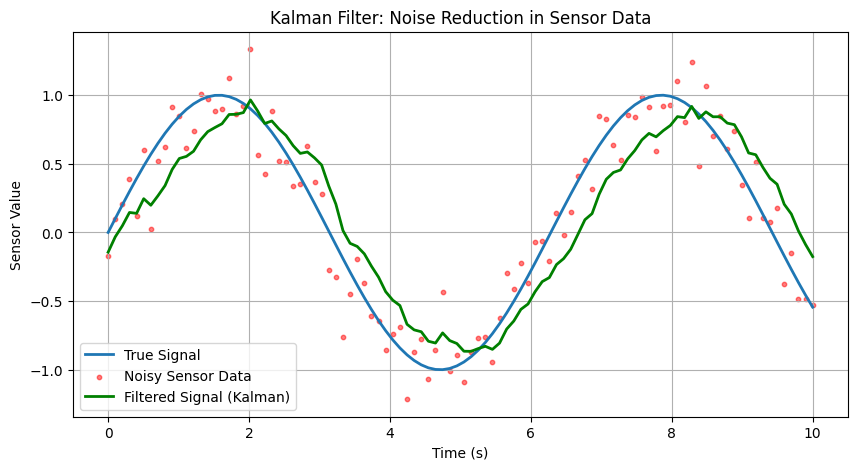

In [ ]:
# Simple 1D Kalman Filter for Sensor Data Smoothing
class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, initial_value=0):
        self.x = initial_value  # Initial estimate
        self.P = 1.0  # Initial uncertainty
        self.Q = process_variance  # Process noise (how much we trust the model)
        self.R = measurement_variance  # Measurement noise (sensor reliability)

    def update(self, measurement):
        # Prediction step (optional in this simple case)

        # Kalman Gain: How much to trust the measurement vs. prediction
        K = self.P / (self.P + self.R)

        # Update estimate with new measurement
        self.x = self.x + K * (measurement - self.x)

        # Update uncertainty
        self.P = (1 - K) * self.P + self.Q

        return self.x  # Return filtered value

# Initialize Kalman Filter
kf = KalmanFilter(process_variance=0.01, measurement_variance=0.2)

# Apply Kalman filter to noisy sensor data
filtered_signal = [kf.update(z) for z in noisy_signal]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, true_signal, label="True Signal", linewidth=2)
plt.scatter(time, noisy_signal, label="Noisy Sensor Data", color='red', s=10, alpha=0.5)
plt.plot(time, filtered_signal, label="Filtered Signal (Kalman)", color='green', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Sensor Value")
plt.title("Kalman Filter: Noise Reduction in Sensor Data")
plt.legend()
plt.grid()
plt.show()
